In [1]:
import pandas as pd
import numpy as np
from GA_portfolio import Portfolio_Selection
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

data = pd.read_excel('指数数据1.xlsx',sheet_name='对数收益率')
data.index=data['日期']
del data['日期']

In [3]:
from GA_portfolio import Portfolio_GA
p = Portfolio_GA(his_data=data.values[:60],return_data=data.values[61:65],s=5,init_method='dirichlet',
    s_method='random',money=1000,random_state=1)
p.ga(1.0,'random_add')


[array([0.2841537 , 0.16460904, 0.03901328, 0.0836444 , 0.38001931,
        0.01687157, 0.0316887 ]),
 array([0.38755375, 0.3705375 , 0.00503685, 0.01591187, 0.0151186 ,
        0.06816404, 0.1376774 ]),
 array([0.03875711, 0.13485426, 0.00399893, 0.50467318, 0.23906909,
        0.04968903, 0.0289584 ]),
 array([0.03020575, 0.01406112, 0.00640122, 0.76335936, 0.09631502,
        0.08066152, 0.008996  ]),
 array([0.08001643, 0.02125119, 0.34421648, 0.28529179, 0.15261879,
        0.0778272 , 0.03877813]),
 array([0.15779165, 0.01070888, 0.10422996, 0.00675573, 0.19080106,
        0.31787524, 0.21183748]),
 array([0.0268432 , 0.19932144, 0.0382971 , 0.09697021, 0.21310775,
        0.22680933, 0.19865098]),
 array([5.84683772e-01, 1.16635032e-01, 2.36049836e-02, 2.02804168e-04,
        1.68181035e-01, 1.75268030e-02, 8.91655697e-02]),
 array([0.04599054, 0.24405971, 0.00049422, 0.09258869, 0.28528577,
        0.14268993, 0.18889114]),
 array([0.0247918 , 0.00360661, 0.05999668, 0.00128287

##### 模型设定

###### 初始候选解的生成

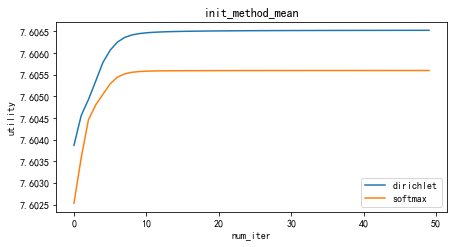

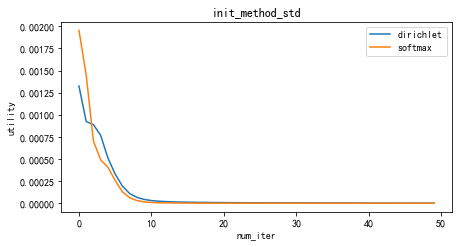

In [2]:
# 两种方法
init_method=['dirichlet','softmax']
plt.figure(figsize=(7,3.5))
plt.figure(1)
plt.title('init_method_mean')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in init_method:
    ps=Portfolio_Selection(data.values,s=1,period=2,candidates=10,
        init_method=i,money=2000,random_state=0)
    res=ps.cal_best_iter()
    plt.plot(res[0])
plt.legend(init_method)
plt.savefig('figure/init_method_mean.png',dpi=600)

plt.figure(figsize=(7,3.5))
plt.figure(2)
plt.title('init_method_std')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in init_method:
    ps=Portfolio_Selection(data.values,s=1,period=2,candidates=10,
        init_method=i,money=2000,random_state=0)
    res=ps.cal_best_iter()
    plt.plot(res[1])
plt.legend(init_method)
plt.savefig('figure/init_method_std.png',dpi=600)

###### 变异函数

In [ ]:
# 变异方法
mutate_method=['exchange','random_add']
plt.figure(figsize=(7,3.5))
plt.figure(1)
plt.title('muate_method_mean')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in mutate_method:
    ps=Portfolio_Selection(data.values,s=1,period=2,candidates=10,
        mutate_method=i,money=2000,random_state=0)
    res=ps.cal_best_iter()
    plt.plot(res[0])
plt.legend(mutate_method)
plt.savefig('figure/muate_method_mean.png',dpi=600)

plt.figure(figsize=(7,3.5))
plt.figure(2)
plt.title('muate_method_std')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in mutate_method:
    ps=Portfolio_Selection(data.values,s=1,period=2,candidates=10,
        mutate_method=i,money=2000,random_state=0)
    res=ps.cal_best_iter()
    plt.plot(res[1])
plt.legend(mutate_method)
plt.savefig('figure/muate_method_std.png',dpi=600)

In [ ]:
# 变异率
mutate_rate=[0,0.5,1.0]
rand_=7
plt.figure(figsize=(7,3.5))
plt.figure(1)
plt.title('muate_rate_mean')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in mutate_rate:
    ps=Portfolio_Selection(data.values,s=1,period=2,candidates=30,
        mutate_rate=i,money=2000,random_state=rand_)
    res=ps.cal_best_iter()
    plt.plot(res[0])
plt.legend(mutate_rate)
plt.savefig('figure/muate_rate_mean.png',dpi=600)

plt.figure(figsize=(7,3.5))
plt.figure(2)
plt.title('muate_rate_std')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in mutate_rate:
    ps=Portfolio_Selection(data.values,s=1,period=2,candidates=30,
        mutate_rate=i,money=2000,random_state=rand_)
    res=ps.cal_best_iter()
    plt.plot(res[1])
plt.legend(mutate_rate)
plt.savefig('figure/muate_rate_std.png',dpi=600)

###### T S period 的取值

In [ ]:
# T & period
Ts = [30,40,50,60,70,80]
Ps = [1,2,3,6,9,12]

arrs=[]
for T in Ts:
    arr=[]
    for period in Ps:
        ps=Portfolio_Selection(data.values,t=T,period=period,money=2000,random_state=0)
        ps.fit()
        arr.append(ps.get_sharpe())
    arrs.append(arr)
result = pd.DataFrame(arrs,index=Ts,columns=Ps)

In [ ]:
# 绘制热力图
sns.heatmap(result,annot=True,linewidths=0.1)
plt.xlabel('period')
plt.ylabel('T')
plt.title('T vs period')
plt.savefig('figure/T&period.png',dpi=600)

In [ ]:
# s
Ss=[1,5,10,15,20]
arr=[]
for s in Ss:
    ps=Portfolio_Selection(data.values,s=s,t=60,period=2,money=2000,random_state=3)
    ps.fit()
    arr.append(ps.get_sharpe())

In [ ]:
# 绘制对比图
import scipy.interpolate as spi
x=np.arange(1,21,1)
ipo3=spi.splrep(Ss,arr,k=3)
iy3=spi.splev(x,ipo3)

plt.figure(figsize=(7,3.5))
plt.xticks(Ss)
plt.xlabel('s')
plt.ylabel('utility')
plt.title('s')
plt.plot(Ss,arr,'ro')
plt.plot(x,iy3,'b-')
plt.savefig('figure/s.png',dpi=600)

###### S的划分

In [ ]:
ps_average=Portfolio_Selection(data.values,t=60,period=2,money=2000,random_state=1)
ps_average.fit(s_method='average')
ps_random=Portfolio_Selection(data.values,t=60,period=2,money=2000,random_state=0)
ps_random.fit(s_method='random')
sharpe_average=ps_average.get_sharpe()
sharpe_random=ps_random.get_sharpe()

In [ ]:
# 绘制净值图
plt.figure(figsize=(7,3.5))
plt.title('average_vs_random')
plt.xlabel('date')
plt.ylabel('assert_value')
plt.plot(ps_average.moneys)
plt.plot(ps_random.moneys)
plt.legend(['average sharpe_ratio= '+str(sharpe_average)+'','random sharpe_ratio= '+str(sharpe_random)])
plt.savefig('figure/s_average_vs_random.png',dpi=600)

##### 选取最优参数

###### 最大迭代次数

In [ ]:
# 计算最大迭代次数
ps=Portfolio_Selection(data.values,s=1,period=2,money=2000,random_state=7)
res=ps.cal_best_iter()

plt.figure(figsize=(7,3.5))
plt.title('num_iter_mean')
plt.ylabel('utility')
plt.xlabel('num_iter')
plt.figure(1)
plt.plot(res[0])
plt.savefig('figure/num_iter_mean.png',dpi=600)

plt.figure(figsize=(7,3.5))
plt.title('num_iter_std')
plt.ylabel('utility')
plt.xlabel('num_iter')
plt.figure(2)
plt.plot(res[1])
plt.savefig('figure/num_iter_std.png',dpi=600)

###### 候选解个数

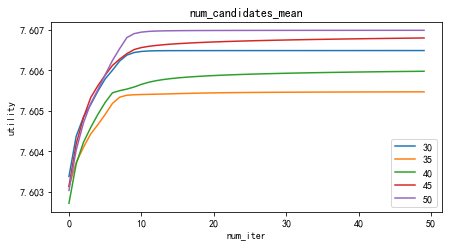

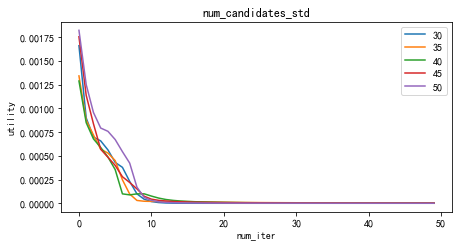

In [2]:
# 计算最优候选解个数
ps=Portfolio_Selection(data.values,s=1,period=2,money=2000,random_state=7)
candidates_list=[30,35,40,45,50]
res=ps.cal_best_candidates(candidates_list)

plt.figure(figsize=(7,3.5))
plt.title('num_candidates_mean')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in range(len(candidates_list)):
    plt.plot(res[0][i])
plt.legend(candidates_list)
plt.savefig('figure/num_candidates_mean.png',dpi=600)

plt.figure(figsize=(7,3.5))
plt.title('num_candidates_std')
plt.ylabel('utility')
plt.xlabel('num_iter')
for i in range(len(candidates_list)):
    plt.plot(res[1][i])
plt.legend(candidates_list)
plt.savefig('figure/num_candidates_std.png',dpi=600)

##### 遗传算法

###### 单期遗传算法vs多期遗传算法

In [ ]:
ps_single=Portfolio_Selection(data.values,s=1,period=2,money=2000,random_state=2)
ps_single.fit()
sharpe_single=ps_single.get_sharpe()

ps_dynamic=Portfolio_Selection(data.values,s=5,period=2,money=2000,random_state=2)
ps_dynamic.fit()
sharpe_dynamic=ps_dynamic.get_sharpe()

In [ ]:
# 绘制净值图
plt.figure(figsize=(7,3.5))
plt.title('single_vs_dynamic')
plt.xlabel('date')
plt.ylabel('assert_value')
plt.plot(ps_single.moneys)
plt.plot(ps_dynamic.moneys)
plt.legend(['single sharpe_ratio= '+str(sharpe_single)+'','dynamic sharpe_ratio= '+str(sharpe_dynamic)])
plt.savefig('figure/single_vs_dynamic.png',dpi=600)

In [ ]:
# 多期遗传算法持仓图
weights_series=list(np.array(ps_dynamic.get_weights()).transpose(1,0))
plt.figure(figsize=(20,5))
for i in range(7):
    plt.plot(weights_series[i])

In [ ]:
np.std(np.array(ps.get_weights()),axis=0)

##### 数据描述性统计

###### 相关系数矩阵

In [ ]:
corr_data=data.corr().values
plt.title('data_correlation_coefficient')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
sns.heatmap(corr_data,annot=True,linewidths=0.1,
    xticklabels=list(data.columns),yticklabels=list(data.columns))
plt.savefig('figure/data_corr.png',dpi=300)

###### 描述性统计

In [ ]:
data.describe().T